<a href="https://colab.research.google.com/github/FokrulBhuiyan/Machine-Learning/blob/master/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US Accidents Data Analysis

In [1]:
pip install opendatasets --upgrade --quiet

### Download the data from kaggle

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

In [3]:
data_filename = './us-accidents/US_Accidents_Dec20.csv'

### Data Prep. and Cleaning

- Load the file with pandas
- Look at file info
- Cleaning data
 

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(data_filename)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = df.select_dtypes(include=numerics)
len(new_df.columns)

15

Percentage of missing values

In [18]:
err_percent = df.isna().sum().sort_values(ascending = False)/len(df)
err_percent

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Amenity                  0.000000e+00
Street                   0.000000e+00
Source                   0.000000e+00
Severity    

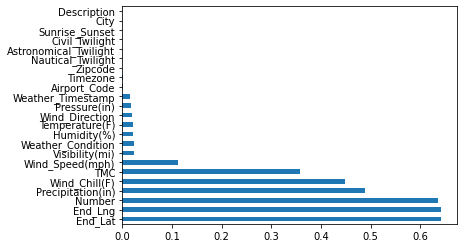

In [27]:
err_percent[err_percent!=0].plot(kind= 'barh')

Remove unuse columns

### Analysis and Visualization

needed Columns:

1. City
2. Start Time
3. start lat, start lng
4. Temperature
5. weather condition

In [28]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [30]:
cities =df.City.unique()
len(cities)

12251

In [37]:
cities_accident= df.City.value_counts()
cities_accident

Houston        114905
Los Angeles     92701
Charlotte       88887
Dallas          77303
Austin          70538
                ...  
Huxley              1
Chimayo             1
Burr Hill           1
Robins              1
Petroleum           1
Name: City, Length: 12250, dtype: int64

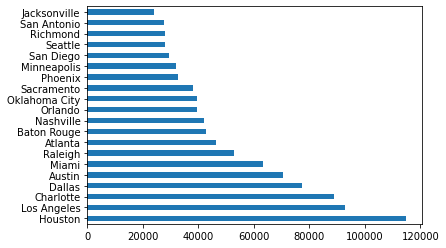

In [39]:
cities_accident[:20].plot(kind='barh')

In [40]:
import seaborn as sns
sns.set_style("darkgrid")

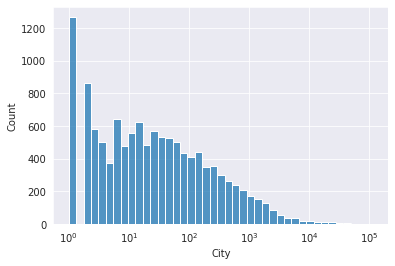

In [48]:
sns.histplot(cities_accident,log_scale=True)

In [45]:
high_accident_cities = cities_accident[cities_accident>=1000]
low_accident_cities = cities_accident[cities_accident<1000]

In [46]:
len(high_accident_cities)/len(cities_accident)

0.05746938775510204

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


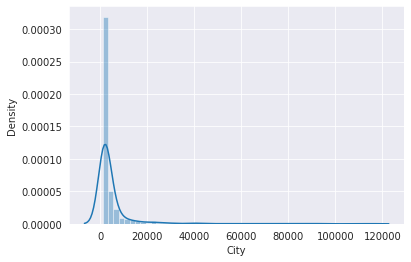

In [47]:
sns.distplot(high_accident_cities)

### Ques & ans
1. more accident in cold or hot weather?
2. which 5 state have the highest num. of accidents?
3. if new york is top populated city, why not in top of the accident list?
ans: not abailable in the list


### Summary

1. no data about new york
2. less then 5% of cities have more then 1000 accidents 
3. over 1200 cities have reported just 1 accident.